In [6]:
### Python Packages ###
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### Proprietary Packages ###
import phase_corr_make_universe_3D as uni
import pspec_3D 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Gaussian white noise background with square wake

In [7]:
A,B = np.round(np.random.normal(0,5,(51,51))),np.round(np.random.normal(0,5,(51,51)))
wake = np.reshape(signal.unit_impulse((51*51),1300),(51,51))+np.reshape(signal.unit_impulse((51*51),1300-50),(51,51))+np.reshape(signal.unit_impulse((51*51),1300-51),(51,51)) +np.reshape(signal.unit_impulse((51*51),1300-52),(51,51))+np.reshape(signal.unit_impulse((51*51),1300+1),(51,51))+np.reshape(signal.unit_impulse((51*51),1300-1),(51,51)) +np.reshape(signal.unit_impulse((51*51),1300+50),(51,51))+np.reshape(signal.unit_impulse((51*51),1300+51),(51,51)) +np.reshape(signal.unit_impulse((51*51),1300+52),(51,51))

B_wake = B+(50*wake)
A_wake = A+(1000*wake)

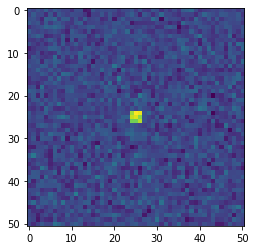

In [8]:
plt.imshow(B_wake)

In [13]:
def correlation_coefficient(patch1, patch2): #pearson correlation coefficient
    product = np.mean((patch1- np.mean(patch1)) * (patch2-np.mean(patch2))) #COV(X,Y)
    stds = np.std(patch1) * np.std(patch2)# sigma_x * sigma_y
    if stds == 0:
        return 0
    else:
        product /= stds # normalize by the stdev of the patch
        return product
    
n_row, n_col = wake.shape

correlation = np.zeros(((2*n_row)-1,(2*n_col)-1))

def correlation_matrix(A, B): #this function takes care of the convolution
    for i in range(0,(2*n_row)-1): 
        for j in range(0,(2*n_row)-1):

            if i < n_row and j< n_col:#takes care of all i,j < n_row,n_col includes full ovelap of arrays
                patch1 = A[:i+1,:j+1]
                patch2 = B[(n_row-1)-i:n_row,(n_col-1)-j:n_col]

            elif i < n_row and j>= n_col:
                patch1 = A[:i+1,j-n_col+1:n_col]
                patch2 = B[(n_row-1)-i:n_row, 0:-j+(n_col-1)]

            elif i >= n_row and j< n_col:
                patch1 = A[i-n_row+1:n_row,:j+1]
                patch2 = B[0:-i+(n_row-1),(n_col-1)-j:n_col]

            else: 
                patch1 = A[i-n_row+1:n_row,j-n_col+1:n_col]
                patch2 = B[0:-i+(n_row-1),0:-j+(n_col-1)]

            correlation[i, j] = correlation_coefficient(patch1,patch2)

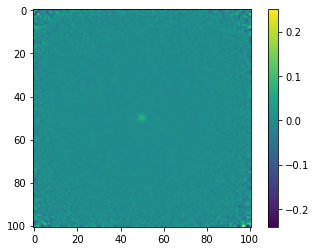

In [14]:
ave_correlation = np.zeros_like(correlation)

nreals = 50

for i in range(nreals):
    A,B = np.round(np.random.normal(0,5,(51,51))),np.round(np.random.normal(0,5,(51,51)))
    A_wake = A+(100*wake)
    B_wake = B+(10*wake)
    correlation_matrix(A_wake,B_wake)
    ave_correlation +=  correlation

ave_correlation /= nreals
plt.imshow(ave_correlation)
plt.colorbar()

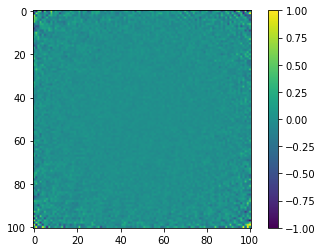

In [15]:

A,B = np.round(np.random.normal(0,5,(51,51))),np.round(np.random.normal(0,5,(51,51)))
correlation_matrix(A,B)

plt.imshow(correlation)
plt.colorbar()